In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
#create the dataframe first

df = pd.DataFrame(columns=['news_article', 'label'])

#creating a function for the job
def find_txt_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files: #iterates over each element in the current directory
            
            #check for '.txt' files
            if file.lower().endswith('.txt'):
            
                file_path = os.path.abspath(os.path.join(root, file))
                dirname = file_path.split(os.path.sep)[-2]
            
                #open and read the file
                with open(file_path, 'r') as f:
                    text = f.read()
                    text = text.replace('\n', ' ')
                    df.loc[len(df)] = [text, dirname]

In [4]:
directory_path = 'BBC'

find_txt_files(directory_path)
print(df.shape)
df.head(30)

(2214, 2)


,news_article,label
0,Consists of 2225 documents from the BBC news w...,BBC
1,Solskjaer raises hopes of return Manchester U...,sport
2,"What now for Kelly Holmes? Last April, Kelly ...",sport
3,O'Connor aims to grab opportunity Johnny O'Co...,sport
4,Gebrselassie in London triple bid Double Olym...,sport
5,London Irish 19-33 Wasps Wasps made light of ...,sport
6,Injury sidelines Philippoussis Mark Philippou...,sport
7,Mansfield 0-1 Leyton Orient An second-half go...,sport
8,Holmes starts 2005 with GB events Kelly Holme...,sport
9,Taylor poised for Scotland return Simon Taylo...,sport


In [5]:
df = df.iloc[1: ]
df

,news_article,label
1,Solskjaer raises hopes of return Manchester U...,sport
2,"What now for Kelly Holmes? Last April, Kelly ...",sport
3,O'Connor aims to grab opportunity Johnny O'Co...,sport
4,Gebrselassie in London triple bid Double Olym...,sport
5,London Irish 19-33 Wasps Wasps made light of ...,sport
...,...,...
2209,Citizenship event for 18s touted Citizenship ...,politics
2210,Blair to face trust issue head on Tony Blair ...,politics
2211,Hewitt decries 'career sexism' Plans to exten...,politics
2212,Terror detainees win Lords appeal Detaining f...,politics


In [6]:
df.label.value_counts()

label
sport            508
business         507
politics         415
tech             397
entertainment    386
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

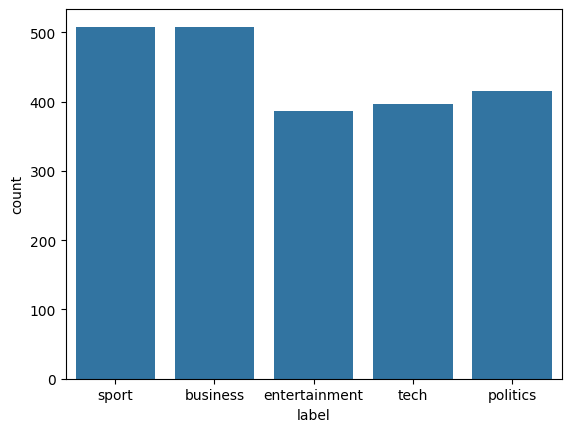

In [7]:
sns.countplot(data=df, x='label')

In [8]:
y = df['label']
X = df[['news_article']]

X

,news_article
1,Solskjaer raises hopes of return Manchester U...
2,"What now for Kelly Holmes? Last April, Kelly ..."
3,O'Connor aims to grab opportunity Johnny O'Co...
4,Gebrselassie in London triple bid Double Olym...
5,London Irish 19-33 Wasps Wasps made light of ...
...,...
2209,Citizenship event for 18s touted Citizenship ...
2210,Blair to face trust issue head on Tony Blair ...
2211,Hewitt decries 'career sexism' Plans to exten...
2212,Terror detainees win Lords appeal Detaining f...


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(1770, 1)

Visualization for the X values

[nltk_data] Downloading package stopwords to /home/raph/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


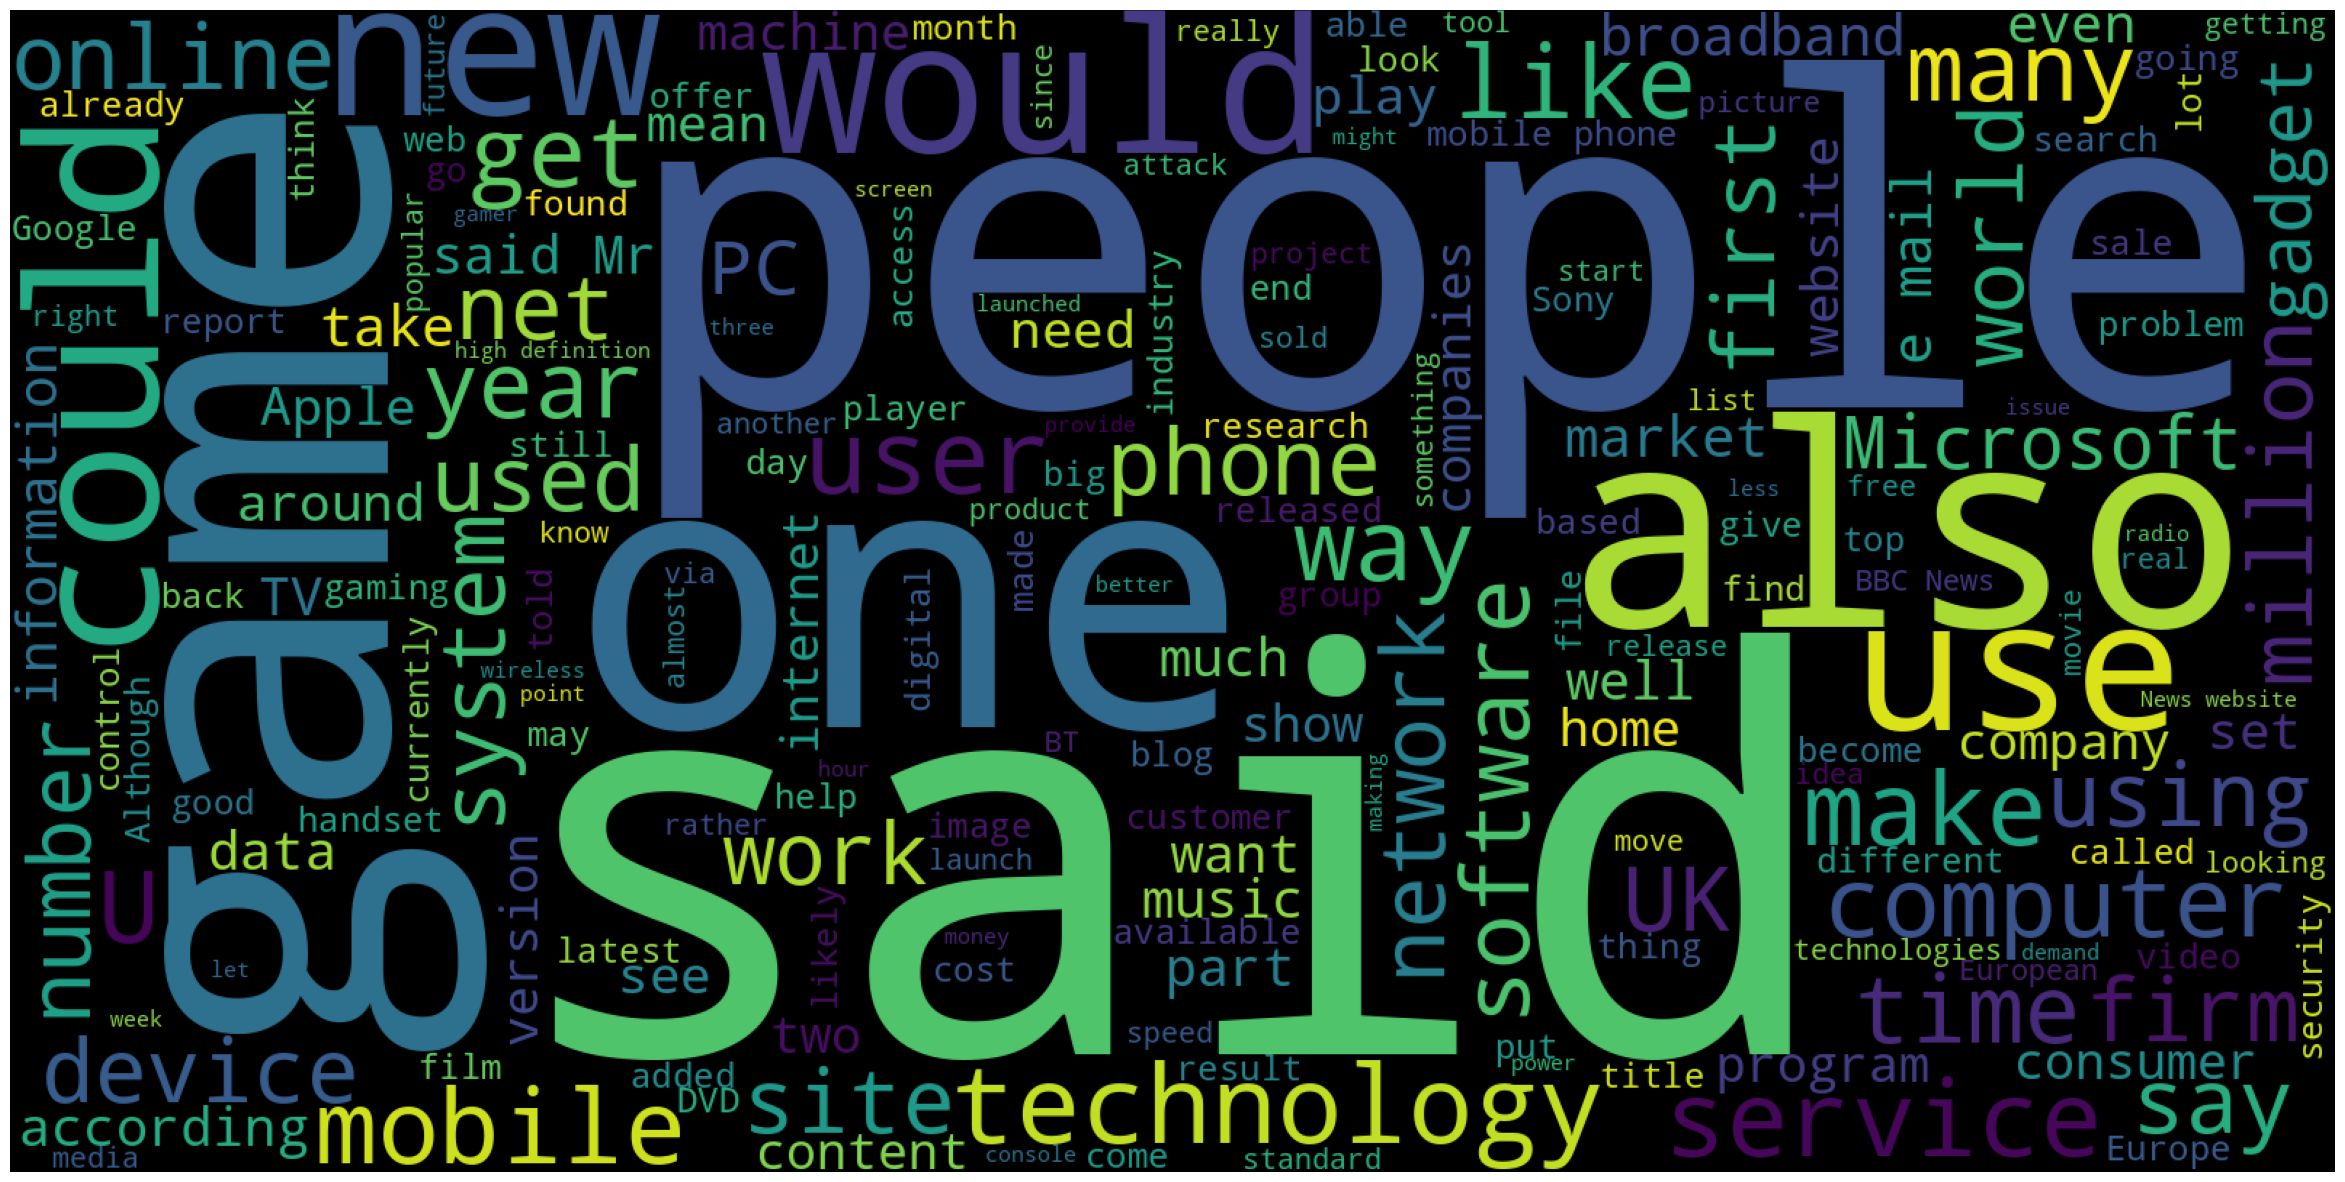

In [13]:
import nltk
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.corpus import stopwords

text = " ".join(X_train.loc[y_train=='tech', 'news_article'])

word_cloud = WordCloud(stopwords=stopwords.words('english'),background_color='black',width=1600,height=800).generate(text)

plt.figure(1, figsize=(30,20))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()